In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf 
from sklearn.preprocessing import MinMaxScaler


In [3]:
df=pd.read_csv(r"C:\Users\ASUS\Desktop\internship\project2\NSE.csv")


In [4]:
df.head()


,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


In [5]:
df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
1230,2013-10-14,160.85,161.45,157.70,159.3,159.45,1281419.0,2039.09
1231,2013-10-11,161.15,163.45,159.00,159.8,160.05,1880046.0,3030.76
1232,2013-10-10,156.00,160.80,155.85,160.3,160.15,3124853.0,4978.80
1233,2013-10-09,155.70,158.20,154.15,155.3,155.55,2049580.0,3204.49
1234,2013-10-08,157.00,157.80,155.20,155.8,155.80,1720413.0,2688.94


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  1235 non-null   object 
 1   Open                  1235 non-null   float64
 2   High                  1235 non-null   float64
 3   Low                   1235 non-null   float64
 4   Last                  1235 non-null   float64
 5   Close                 1235 non-null   float64
 6   Total Trade Quantity  1235 non-null   float64
 7   Turnover (Lacs)       1235 non-null   float64
dtypes: float64(7), object(1)
memory usage: 77.3+ KB


In [7]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1.235000e+03,1235.000000
mean,168.954858,171.429069,166.402308,168.736356,168.731053,2.604151e+06,4843.166502
std,51.499145,52.436761,50.542919,51.587384,51.544928,2.277028e+06,5348.919832
min,103.000000,104.600000,100.000000,102.600000,102.650000,1.001800e+05,128.040000
25%,137.550000,138.925000,135.250000,137.175000,137.225000,1.284482e+06,1801.035000
50%,151.500000,153.250000,149.500000,151.200000,151.100000,1.964885e+06,3068.510000
75%,169.000000,172.325000,166.700000,169.100000,169.500000,3.095788e+06,5852.600000
max,327.700000,328.750000,321.650000,325.950000,325.750000,2.919102e+07,55755.080000


In [8]:
df.dtypes

Date                     object
Open                    float64
High                    float64
Low                     float64
Last                    float64
Close                   float64
Total Trade Quantity    float64
Turnover (Lacs)         float64
dtype: object

In [10]:
missing_values_count = df.isnull().sum()

total_cells = np.product(df.shape)

total_missing = missing_values_count.sum()

percentage_missing = (total_missing/total_cells)*100

print(percentage_missing)

0.0


In [9]:
NAN = [(c, df[c].isnull().mean()*100) for c in df]
NAN = pd.DataFrame(NAN, columns=['column_name', 'percentage'])
NAN

,column_name,percentage
0,Date,0.0
1,Open,0.0
2,High,0.0
3,Low,0.0
4,Last,0.0
5,Close,0.0
6,Total Trade Quantity,0.0
7,Turnover (Lacs),0.0


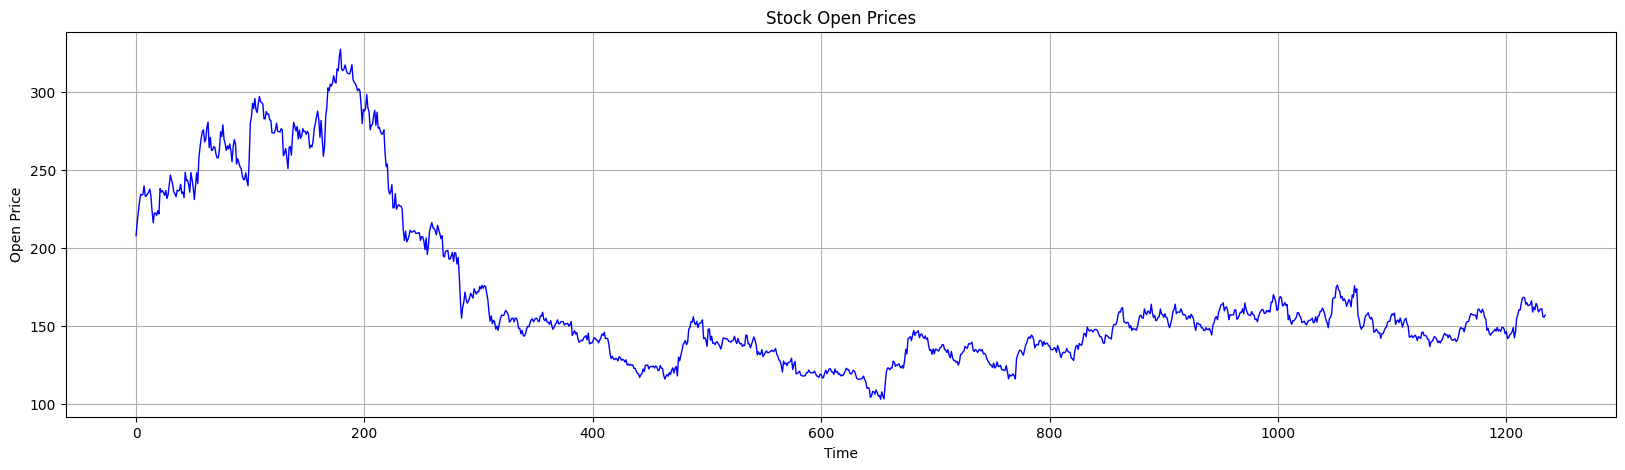

In [11]:
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(20, 5))

# Plot the 'Open' column
plt.plot(df['Open'], linewidth=1, color='blue')

# Customize the plot
plt.xlabel('Time')
plt.ylabel('Open Price')
plt.title('Stock Open Prices')
plt.grid(True)

# Display the plot
plt.show()

In [12]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

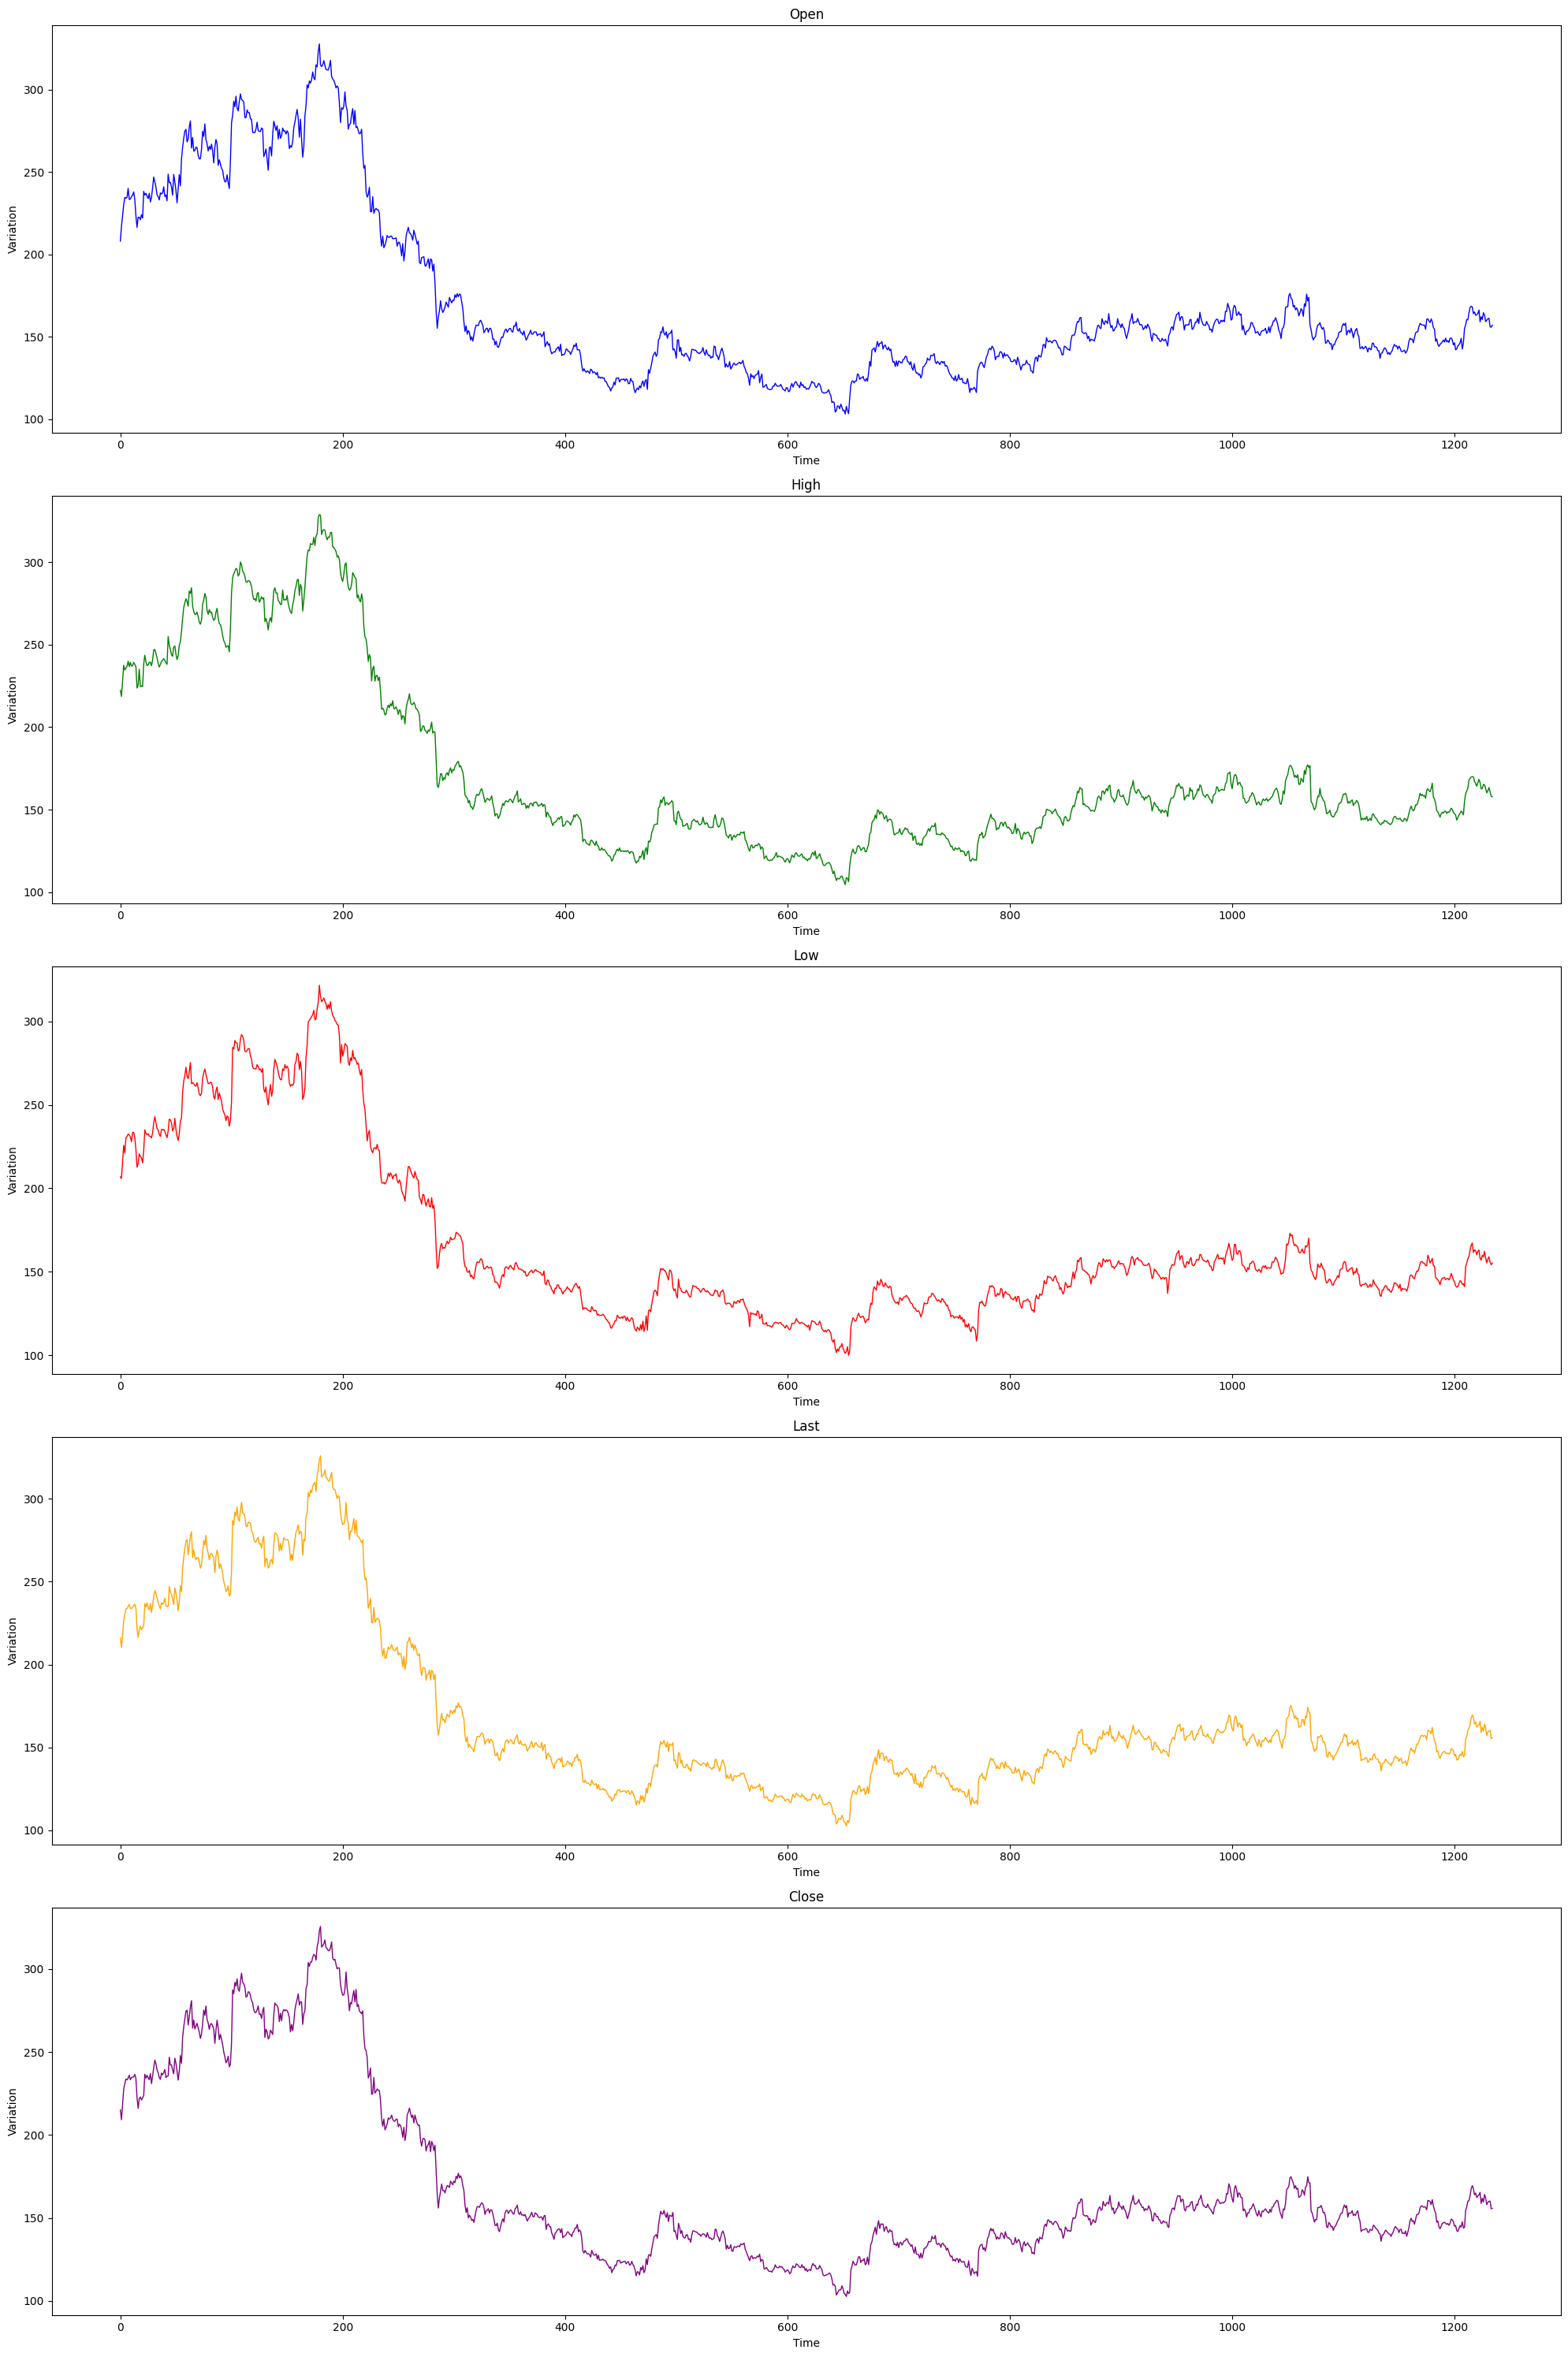

In [13]:
# Define the columns to plot
cols_plot = ['Open', 'High', 'Low', 'Last', 'Close']

# Create subplots
fig, axes = plt.subplots(nrows=len(cols_plot), figsize=(20, 30))

# Define color variations
colors = ['blue', 'green', 'red', 'orange', 'purple']

# Plot each column on a separate subplot with different colors
for i, (col, color) in enumerate(zip(cols_plot, colors)):
    axes[i].plot(df[col], linewidth=1, color=color)
    axes[i].set_ylabel('Variation')
    axes[i].set_xlabel('Time')
    axes[i].set_title(col)

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

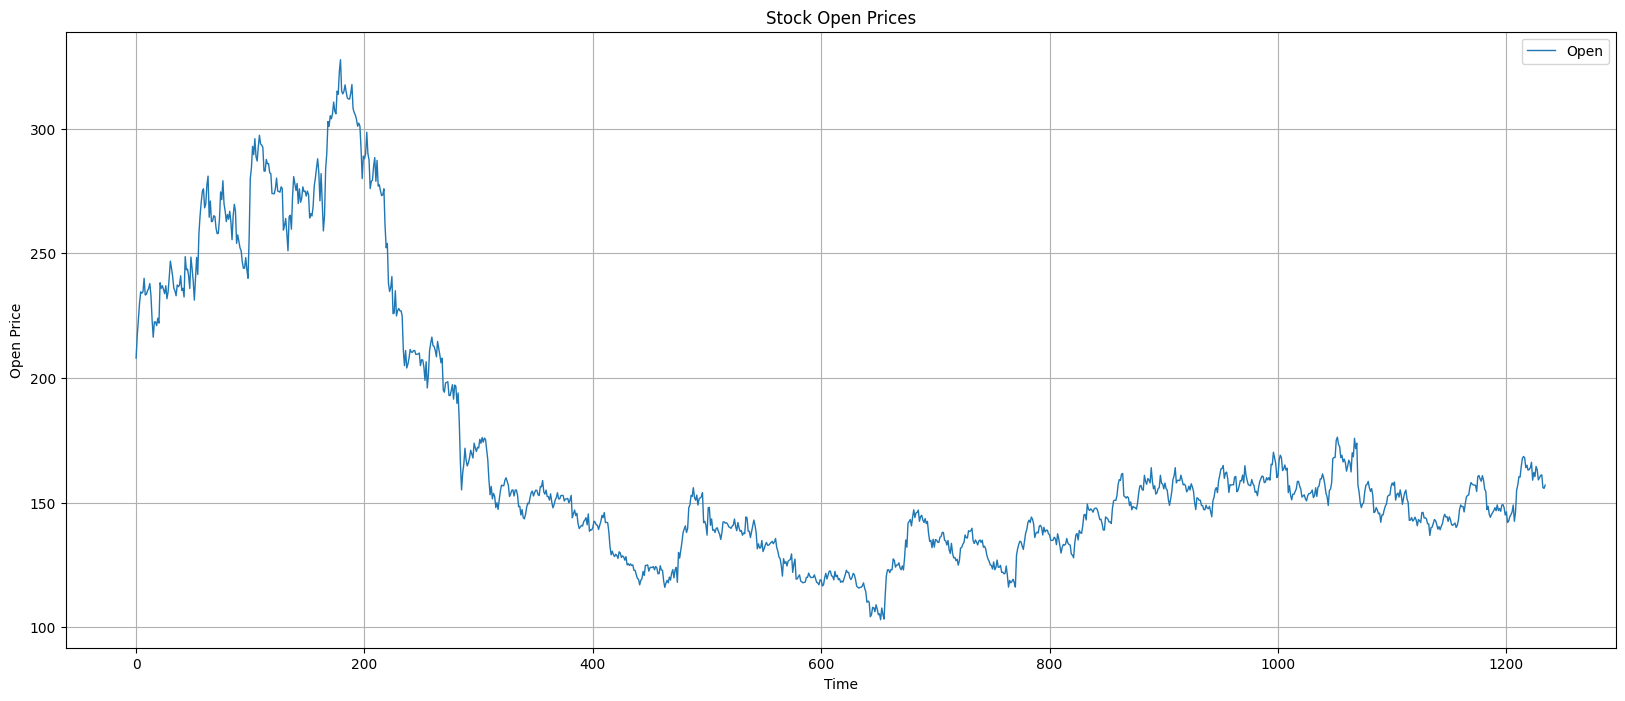

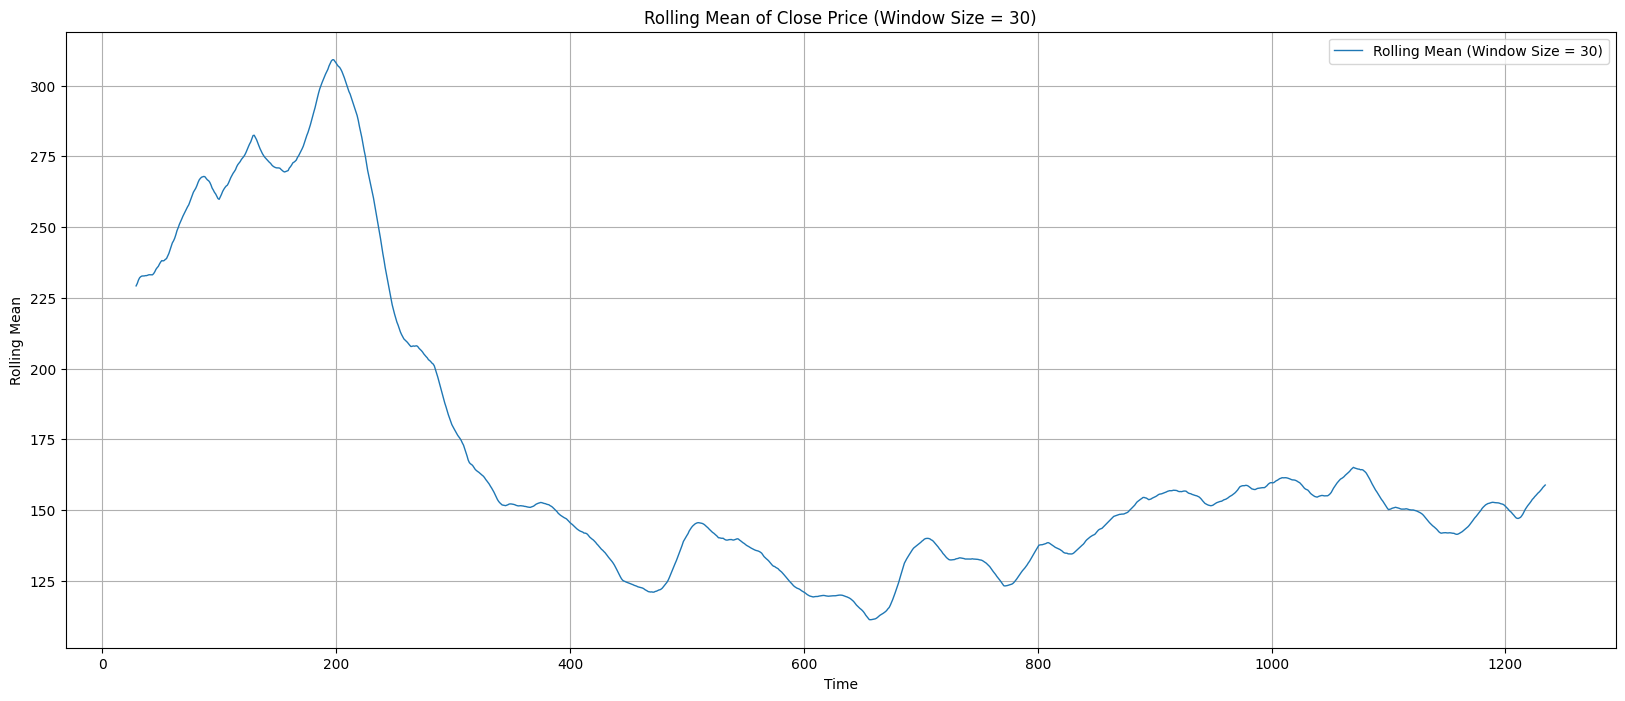

In [14]:

# Plot the 'Open' column
plt.figure(figsize=(20, 8))
plt.plot(df['Open'], linewidth=1, label='Open')
plt.xlabel('Time')
plt.ylabel('Open Price')
plt.title('Stock Open Prices')
plt.legend()
plt.grid(True)

# Calculate rolling mean with a window size of 30 for the 'Close' column
rolling_mean = df['Close'].rolling(window=30).mean()

# Plot the rolling mean
plt.figure(figsize=(20, 8))
plt.plot(rolling_mean, linewidth=1, label='Rolling Mean (Window Size = 30)')
plt.xlabel('Time')
plt.ylabel('Rolling Mean')
plt.title('Rolling Mean of Close Price (Window Size = 30)')
plt.legend()
plt.grid(True)

# Display the plots
plt.show()

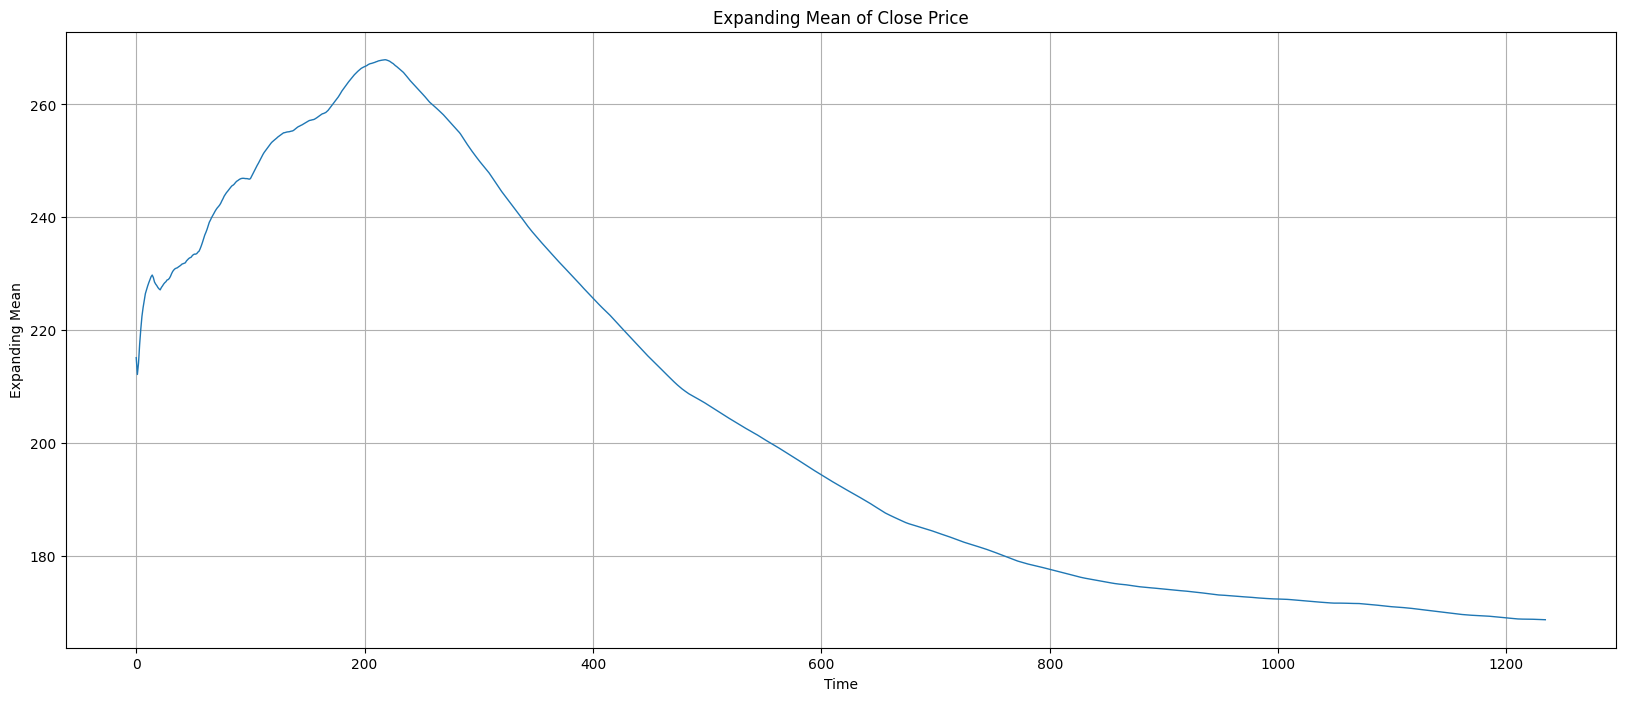

In [15]:
# Calculate expanding mean
expanding_mean = df['Close'].expanding(min_periods=1).mean()

# Plot the expanding mean
plt.figure(figsize=(20, 8))
plt.plot(expanding_mean, linewidth=1)
plt.xlabel('Time')
plt.ylabel('Expanding Mean')
plt.title('Expanding Mean of Close Price')
plt.grid(True)

# Display the plot
plt.show()


In [16]:
df2=df.reset_index()['Open']
df2

0       208.00
1       217.00
2       223.50
3       230.00
4       234.55
         ...  
1230    160.85
1231    161.15
1232    156.00
1233    155.70
1234    157.00
Name: Open, Length: 1235, dtype: float64

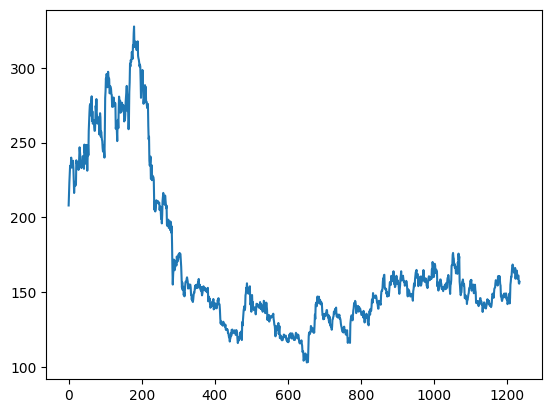

In [17]:
plt.plot(df2)

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df2=scaler.fit_transform(np.array(df2).reshape(-1,1))
print(df2)

[[0.46728972]
 [0.50734312]
 [0.53627058]
 ...
 [0.23587005]
 [0.23453494]
 [0.24032043]]


In [19]:
train_size=int(len(df2)*0.75)
test_size=len(df2)-train_size
train_data,test_data=df2[0:train_size,:],df2[train_size:len(df2),:1]

In [20]:
train_size,test_size

(926, 309)

In [21]:
train_data,test_data

(array([[0.46728972],
        [0.50734312],
        [0.53627058],
        [0.56519804],
        [0.58544726],
        [0.58322207],
        [0.58544726],
        [0.60970182],
        [0.57988429],
        [0.58099688],
        [0.58744993],
        [0.59167779],
        [0.60035603],
        [0.57921673],
        [0.53604806],
        [0.50445038],
        [0.5318202 ],
        [0.5318202 ],
        [0.52514464],
        [0.53849577],
        [0.52959502],
        [0.60169114],
        [0.59190031],
        [0.59635069],
        [0.58900757],
        [0.582332  ],
        [0.59635069],
        [0.57320872],
        [0.58522474],
        [0.61103694],
        [0.64040943],
        [0.62750334],
        [0.61326213],
        [0.59212283],
        [0.58744993],
        [0.57854918],
        [0.5976858 ],
        [0.59479306],
        [0.59746328],
        [0.6141522 ],
        [0.58811749],
        [0.59190031],
        [0.57632399],
        [0.64842012],
        [0.62483311],
        [0

In [22]:
def create_dataset(dataset, time_step=1):
    train_X, train_Y = [], []
    
    # Iterate over the dataset
    for i in range(len(dataset) - time_step - 1):
        # Extract input sequence
        input_seq = dataset[i:i+time_step, 0]
        
        # Extract target value
        target_val = dataset[i + time_step, 0]
        
        # Append input sequence and target value to the respective lists
        train_X.append(input_seq)
        train_Y.append(target_val)
    
    # Convert the lists to numpy arrays
    train_X = np.array(train_X)
    train_Y = np.array(train_Y)
    
    return train_X, train_Y

In [23]:
import numpy
time_step = 100
train_x, train_y = create_dataset(train_data, time_step)
test_x, test_y = create_dataset(test_data, time_step)

In [24]:
print(train_x.shape), print(train_y.shape)

(825, 100)
(825,)


(None, None)

In [25]:
train_x =train_x.reshape(train_x.shape[0],train_x.shape[1] , 1)
test_x = test_x.reshape(test_x.shape[0],test_x.shape[1] , 1)

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [27]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [30]:
model.fit(train_x,train_y,validation_data=(test_x,test_y),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
13/13 [==============================] - 10s 359ms/step - loss: 0.0275 - val_loss: 0.0017
Epoch 2/100
13/13 [==============================] - 3s 267ms/step - loss: 0.0041 - val_loss: 0.0029
Epoch 3/100
13/13 [==============================] - 3s 274ms/step - loss: 0.0033 - val_loss: 0.0016
Epoch 4/100
13/13 [==============================] - 3s 260ms/step - loss: 0.0027 - val_loss: 0.0011
Epoch 5/100
13/13 [==============================] - 3s 264ms/step - loss: 0.0024 - val_loss: 0.0012
Epoch 6/100
13/13 [==============================] - 3s 250ms/step - loss: 0.0023 - val_loss: 0.0012
Epoch 7/100
13/13 [==============================] - 3s 253ms/step - loss: 0.0022 - val_loss: 0.0010
Epoch 8/100
13/13 [==============================] - 3s 250ms/step - loss: 0.0021 - val_loss: 0.0013
Epoch 9/100
13/13 [==============================] - 3s 237ms/step - loss: 0.0021 - val_loss: 9.7947e-04
Epoch 10/100
13/13 [==============================] - 3s 254ms/step - loss: 0.0019 - v

In [31]:
train_predict=model.predict(train_x)
test_predict=model.predict(test_x)

7/7 [==============================] - 0s 59ms/step


In [32]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [34]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(train_y,train_predict))

170.97146952008137

In [35]:
math.sqrt(mean_squared_error(test_y,test_predict))

150.1740455585175

In [40]:
look_back=100
trainPredictPlot = numpy.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

In [41]:
testPredictPlot = numpy.empty_like(df)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict

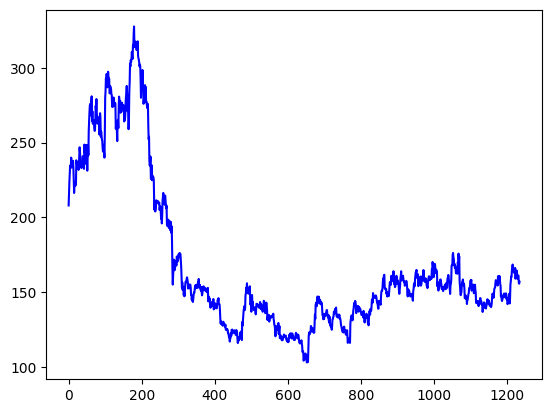

In [36]:
pred  = scaler.inverse_transform(df2)
plt.plot(pred,color='blue')
plt.show()

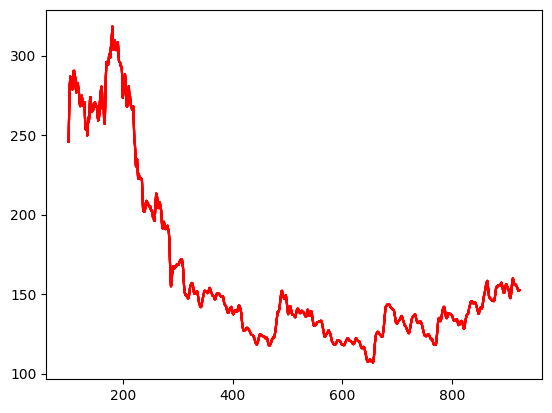

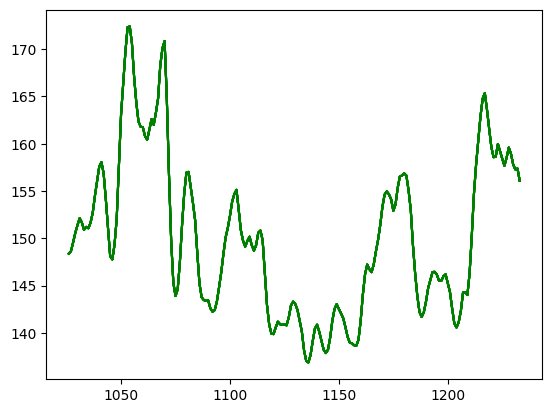

In [42]:
plt.plot(trainPredictPlot,color='red')
plt.show()
plt.plot(testPredictPlot,color='green')
plt.show()

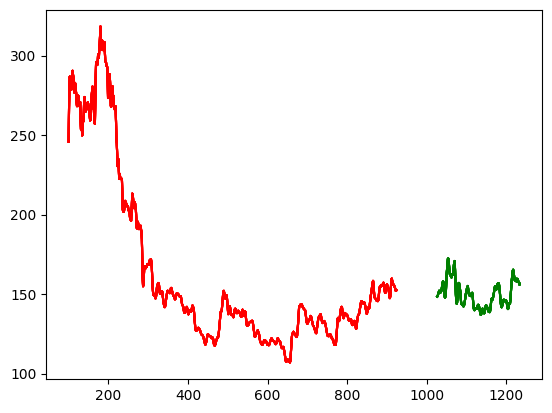

In [44]:
plt.plot(trainPredictPlot,color='red')
plt.plot(testPredictPlot,color='green')
plt.show()

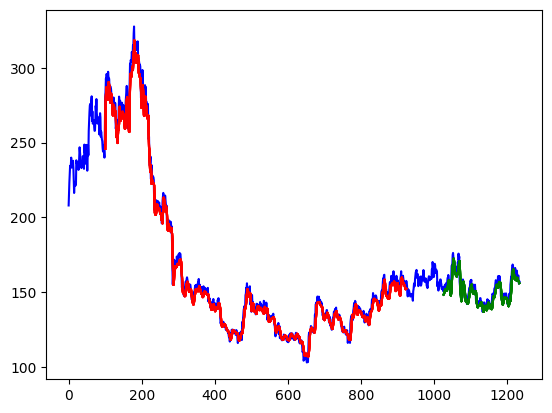

In [45]:
plt.plot(pred,color='blue')
plt.plot(trainPredictPlot,color='red')
plt.plot(testPredictPlot,color='green')
plt.show()

In [46]:
len(test_data)

309

In [47]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 0)

In [48]:
model.save("saved_model.h5")